## 为sylvia制作词云

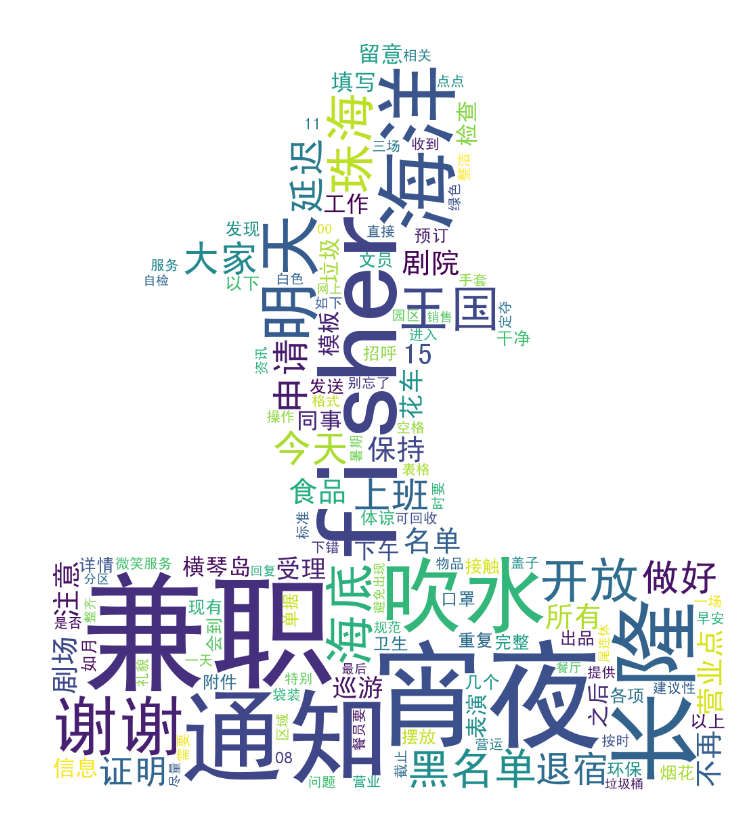

In [33]:
# -*- coding: utf-8 -*-
''''
正常运行这份代码需要如下文件：
1.月亮与六便士.txt 欲进行分词的文件
2.simhei.ttf 绘制词云图时需要字体文件
3.stopwords.txt 停用词文件
'''
import jieba
import numpy
import pandas
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
from collections import Counter
from numpy import array

#设置文件的编码，对文件进行读入，相比边读遍转码方法更实用
with open('sylvia.txt',encoding='utf-8') as f:
    content = f.read()

#使用jieba进行分词，将分词结果存储在一个list中
segments = []
segs = jieba.cut(content)
for seg in segs:
    if len(seg)>1:#过滤一个字的词或者标点符号
        segments.append(seg)

#为方便统计词频，把结果保存在pandas的DataFrame中
segmentDF = pandas.DataFrame({'segment':segments})

#读取设定停用词的CSV文件(文件中只有一列数据)，移除停用词
#注意：如果想对WeiBoStopwords这个文件添加新的停用词，不要用windows的记事本打开！！！！否则会报错
stopwords = pandas.read_csv("stopwords.txt",encoding='utf-8')

#过滤segmentDF中为停用词的数据
segmentDF = segmentDF[~segmentDF.segment.isin(stopwords.stopword)]

#对词频进行统计,按照频率从高到低排列数据
segStat = segmentDF.groupby(by=["segment"])["segment"].agg({"计数":numpy.size}).reset_index().sort_values(by=["计数"], ascending=False)


from wordcloud import WordCloud
import matplotlib.pyplot as plt

#设置词云对象参数
bg_pic= array(Image.open('djs-5.jpg'))
wordcloud = WordCloud(font_path='simhei.ttf',background_color="white",mask=bg_pic)

#使用数据构建词云对象
wordcloud = wordcloud.fit_words(dict(segStat.head(1000).itertuples(index=False)))
"""
对于itertuples函数，可参考下面的测试：

for i in segStat.head(5).itertuples(index=False):
    print(i)

上述代码的输出结果为：
Pandas(segment='\r\n', 计数=4923)
Pandas(segment='政策', 计数=456)
Pandas(segment='购房', 计数=417)
Pandas(segment='合同', 计数=402)
Pandas(segment='17', 计数=343)
"""

#设置参数创建图像
plt.figure(num="test", figsize=(20, 10),dpi=500000000, facecolor='w',edgecolor='w')
"""
num: 图像的编号，也可以命名为 字符串类型，如“test"
figsize:指定图像大小的一个tuple参数——(宽度，长度)，以英寸为单位，其中1英寸等于2.54 cm
dpi：图像像素
facecolor:图片贴面色（The figure patch facecolor），默认为灰色
edgecolor：图形贴边缘颜色（The figure patch edge color）

更多参数见：http://matplotlib.org/api/figure_api.html
"""
plt.axis("off")          #关闭显示数轴（以及对应的数字）
plt.imshow(wordcloud)    #用matplotlib包对图片进行绘制
plt.show(wordcloud)      #显示图像
#wordcloud.to_file('outputFiles/demo4_2_output.jpg')
plt.close()
